In [1]:
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.8


# Projeto Final
### Esse notebook tem por objetivo ser apresentado como projeto final do curso de Análise de dados com Python e Pandas.
- O objetivo é realizar uma analise exploratoria de dados e retirar insights da base de dados que demosntrem o conhecimento adquirido no curso [Análise de dados com Python e Pandas](https://web.dio.me/project/analise-de-dados-com-python-e-pandas/learning/8cc8c67e-eb34-4254-af7a-c0ff8cf72834?back=/track/banco-carrefour-data-engineer) oferecido pela [Digital Innovation One](https://digitalinnovation.one/).
- Os dados analisados representam vendas em uma rede de lojas no Brasil.
- Com a analise pretende-se responder:
    1. Qual loja mais vende
    2. Qual produto mais vende
    3. Qual fabricante mais vende
    4. Qual o produto com maior e menor lucro
    5. Epoca de maior venda
- **obs:** Determinar as questões de nogocio a serem repondidas tambem ficou a cargo do aluno.


In [2]:
#Imprtando as bibliotecas necessarias a analise.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Realizando a leitura do arquivo em Excel
df= pd.read_excel('./AdventureWorks.xlsx')

In [4]:
#Entendendo a base de dados
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Detalhando o datafrmae, informações sobre tipo de dados, e tamanho.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

- Até aqui notamos que a base de dados possui 16 colunas, e que o pandas consegue reconhecer os tipos de dados presentes na base de dados.
- Precisamos observar questões de estatistica descritiva, e quais lojas existem na base dde dados, além de fabricantes e produtos para poder responder as questões de negocio.

In [6]:
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000


In [7]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

In [8]:
df["Fabricante"].unique()

array(['Adventure Works', 'Fabrikam, Inc.', 'Contoso, Ltd'], dtype=object)

In [9]:
df["Produto"].unique()

array(['Adventure Works Laptop15.4W M1548 Red',
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 White",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Grey",
       "Fabrikam Trendsetter 2/3'' 17mm X100 Black",
       "Fabrikam Trendsetter 1/3'' 8.5mm X200 Black",
       'Adventure Works Laptop15.4W M1548 Black',
       'Headphone Adapter for Contoso Phone E130 Silver',
       'Headphone Adapter for Contoso Phone E130 White'], dtype=object)

In [10]:
df["ID Loja"].unique()

array([199, 306, 307], dtype=int64)

- Note que não existe valor faltante.
- Temos na base de dados apenas três fabricantes.
- São nove produtos difrentes.
- Apenas três lojas.

- Pelo fato de ter apenas três lojas, e três fabricantes, seria mais interessante gerar um grafico tipo pizza para poder saber qual loja e qual fabricante mais vende.
- Dada a quantidade de produtos, seria mais intuitivo ter um grafico de barras horizontal para demosntrar qual produto mais vende.
- Será necessario realizar operações na base de dadois para gerar informações que mostrem o lucro e para poder descobrir qual a epoca do ano mais vende.

In [11]:
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"])
df["lucro"]  = df["Valor Venda"] - df["custo"]

In [12]:
df["trimestre_venda"] = df["Data Venda"].dt.quarter

In [13]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,trimestre_venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,2


In [14]:
df.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,custo,lucro,trimestre_venda
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,270.015487,1225.238938,19029.092920,272.006150,742.527965,62.950221,689.123294,6620.139538,2750.866206,3869.273333,2.577434
std,50.955280,706.698742,96.427655,129.765051,368.589889,148.945964,822.363117,4319.407257,1646.068320,2823.813548,1.159763
min,199.000000,366.000000,18815.000000,5.090000,9.990000,2.000000,0.000000,159.840000,81.440000,78.400000,1.000000
25%,199.000000,384.000000,18964.750000,324.690000,758.000000,6.000000,0.000000,3920.000000,1742.900000,2001.720000,2.000000
50%,306.000000,1202.000000,19060.000000,330.660000,980.000000,9.000000,461.166000,5798.700000,2091.480000,3405.240000,3.000000
75%,307.000000,1226.000000,19107.000000,348.580000,998.000000,17.000000,1005.075000,7986.000000,3571.590000,4670.680000,4.000000
max,307.000000,2497.000000,19145.000000,348.580000,999.000000,1560.000000,6272.000000,29400.000000,11154.560000,19659.300000,4.000000


In [15]:
df["ID Loja"].value_counts(ascending=False)

307    319
199    307
306    278
Name: ID Loja, dtype: int64

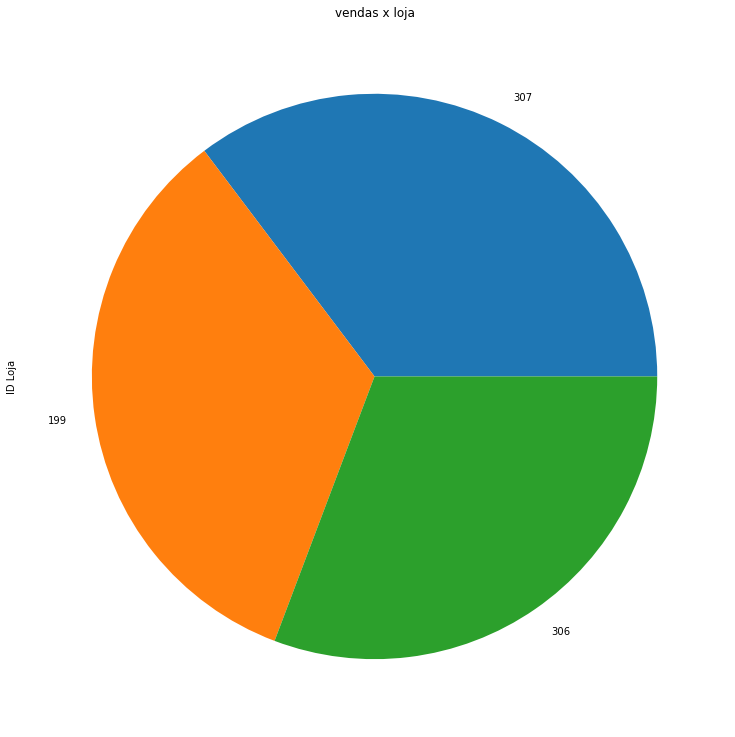

In [16]:
plt.figure(figsize=(16, 13))
plt.title("vendas x loja")
plt.savefig("Quantidade de vendas por loja.png")
df["ID Loja"].value_counts(ascending=False).plot.pie();

- Vemos que a loja que mais vende é a de ID 307.

In [17]:
df["Fabricante"].value_counts(ascending=False)

Fabrikam, Inc.     494
Adventure Works    238
Contoso, Ltd       172
Name: Fabricante, dtype: int64

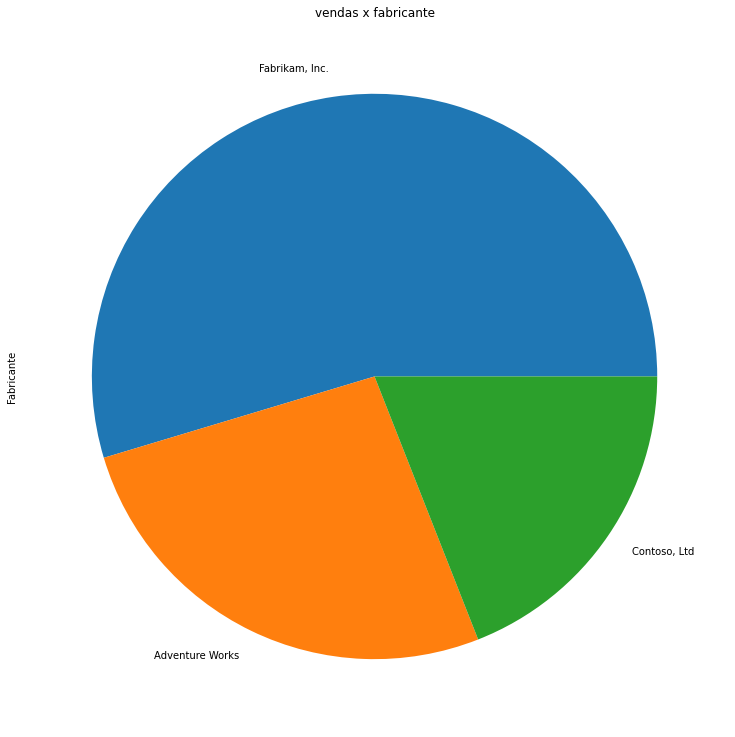

In [18]:
plt.figure(figsize=(16, 13))
plt.title("vendas x fabricante")
plt.savefig("Quantidade de vendas por fabricante.png")
df["Fabricante"].value_counts(ascending=False).plot.pie();

- Podemos notar que o Fabricante que mais vende é o Fabrikam, Inc.

In [19]:
df["Produto"].value_counts(ascending=False)

Adventure Works Laptop15.4W M1548 Black            123
Fabrikam Trendsetter 2/3'' 17mm X100 Grey          118
Adventure Works Laptop15.4W M1548 Red              115
Fabrikam Trendsetter 2/3'' 17mm X100 Black         103
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey          94
Fabrikam Trendsetter 1/3'' 8.5mm X200 White         90
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black         89
Headphone Adapter for Contoso Phone E130 Silver     87
Headphone Adapter for Contoso Phone E130 White      85
Name: Produto, dtype: int64

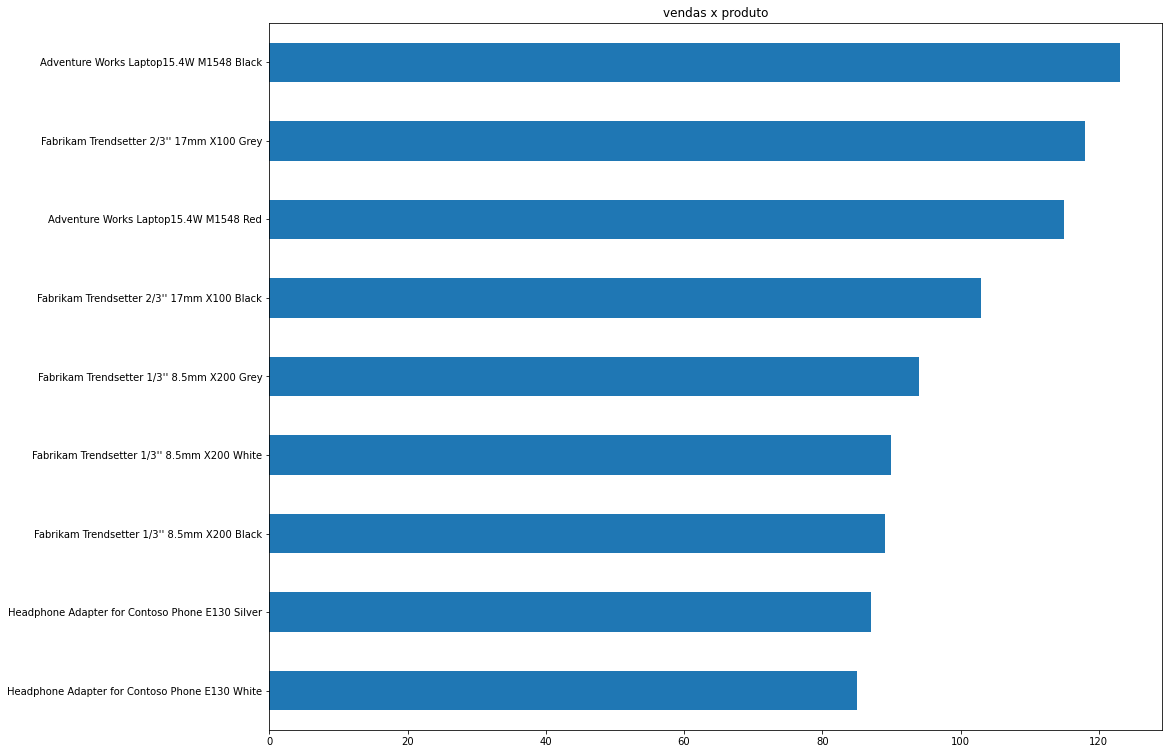

In [20]:
plt.figure(figsize=(16, 13))
plt.title("vendas x produto")
plt.savefig("Quantidade de vendas por produto.png")
df["Produto"].value_counts(ascending=True).plot.barh();

- Podemos notar que o Produot que mais vende é o Adventure Works Laptop15.4W M1548 Black.

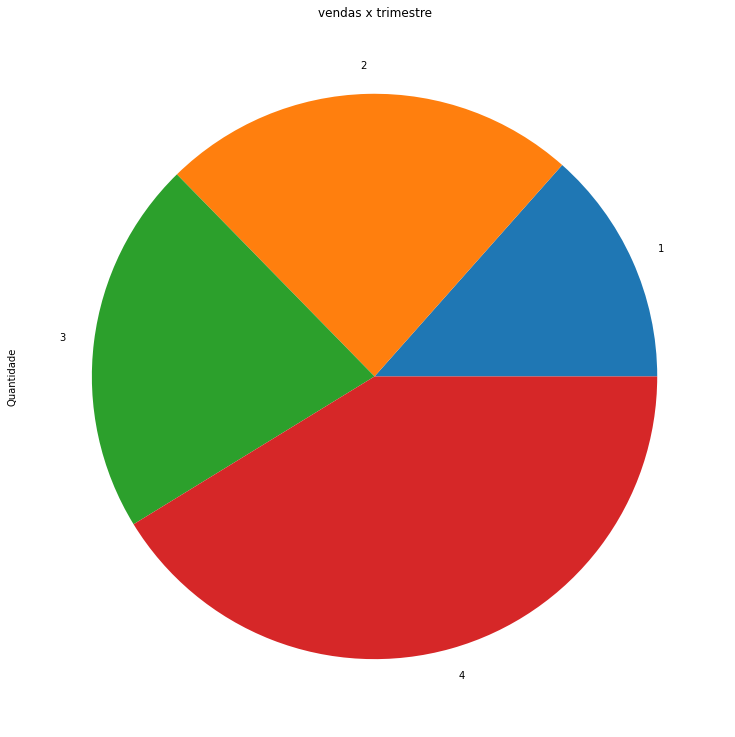

In [21]:
plt.figure(figsize=(16, 13))
plt.title("vendas x trimestre")
plt.savefig("Quantidade de vendas por trimestre.png")
df.groupby(df["trimestre_venda"])["Quantidade"].sum().plot.pie();

- Podemos notar que o trimestre que mais vende é o quarto trimestre.

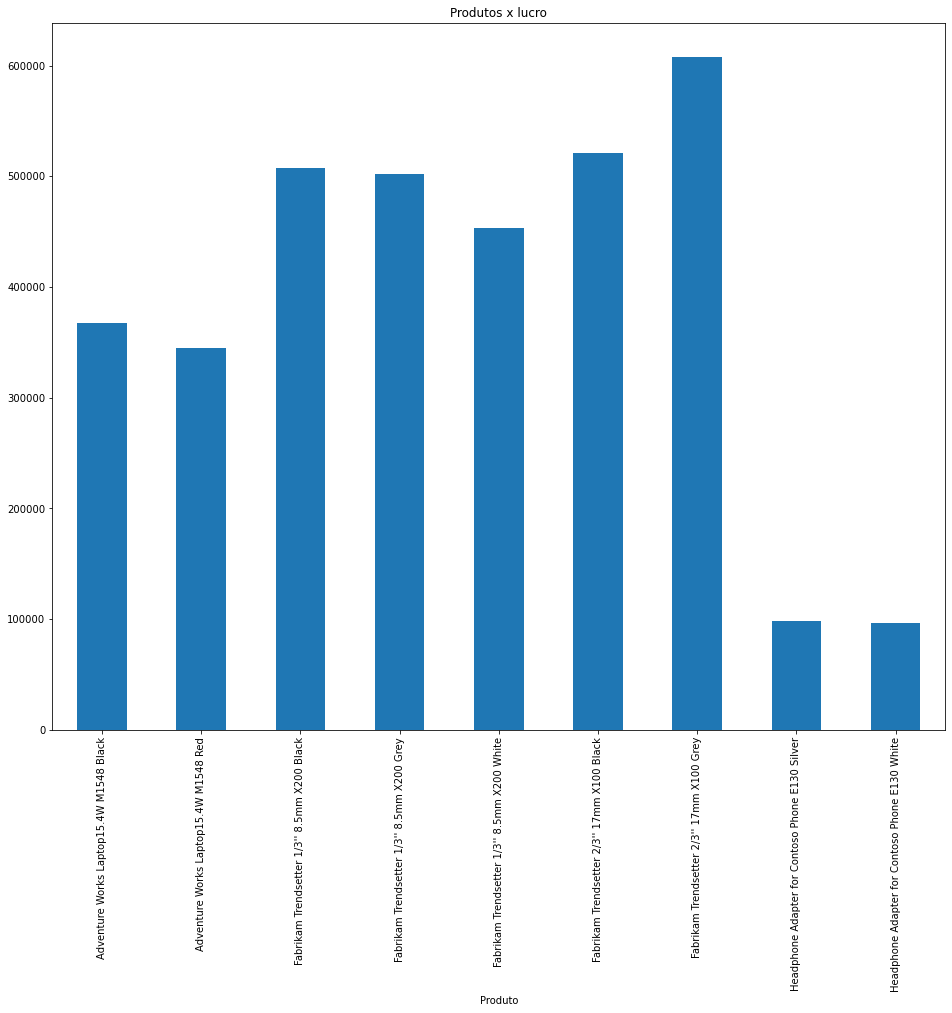

In [22]:
plt.figure(figsize=(16, 13))
plt.title("Produtos x lucro")
plt.savefig("Produto com mior lucro.png")
df.groupby(df["Produto"])["lucro"].sum().plot.bar();

- Podemos notar que o Produto que mais gera lucro é o Adventure Works Laptop15.4W M1548 Black.